In [1]:
# Before running this file, activate the venv using "sklearn-venv\Scripts\activate"
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets


#for MV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
plt.style.use('ggplot')

# Using panda.io to read the dataset
unprocessed_data_X = pd.read_csv("heart.csv")
unprocessed_data_y = unprocessed_data_X.loc[:, "target"]

# Feature Selection using a chi-squared scoring function
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
feature_selection = SelectKBest(chi2, k=11)
processed_data_X = feature_selection.fit_transform(
    unprocessed_data_X, unprocessed_data_y)
processed_data_Y = processed_data_X[:, 10]
# Hyperparameters: score_func - chi2

# These features had the 3 lowest chi2 scores and will be excluded:
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# number of major vessels (0-3) colored by flourosopy

# SMOTE
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
smote_processed_data_X, smote_processed_data_Y = SMOTE(
).fit_resample(processed_data_X, processed_data_Y)
# Hyperparameters: sampling_strategy - auto = resampling only the minority class
# k_neighbors - default = 5

# 27 new entries were created by SMOTE to oversample the minority

# 70%/30% Training Test Split
processed_train_X, processed_test_X, processed_train_Y, processed_test_Y = train_test_split(
    processed_data_X, processed_data_Y, test_size=0.3)
smote_train_X, smote_test_X, smote_train_Y, smote_test_Y = train_test_split(
    smote_processed_data_X, smote_processed_data_Y, test_size=0.3)
# Hyperparameters: test_size - 30
# train_size - 70
# shuffle default = True


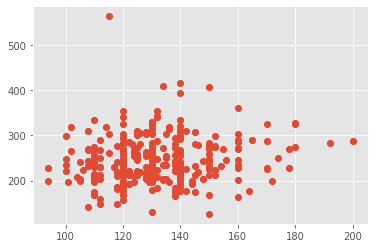

In [2]:
# print(unprocessed_data_X)
g1 = unprocessed_data_X.loc[:, "age":"target"]
plt.scatter('trestbps', 'chol', data=g1);

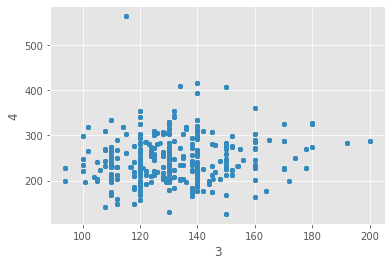

In [3]:
smoteDF = pd.DataFrame(smote_processed_data_X) # Convert SMOTE-treated data numpy array to DataFrame to use .loc
smoteDF.to_csv("SMOTEData.csv")

# print(smoteDF)
g2 = smoteDF.loc[1025:1051,:] # New data from SMOTE
# print (g2) 
smoteDF.plot(x=3, y=4, kind='scatter');

---RANDOM FOREST---
RF w/ SMOTE Test Set Accuracy: 1.0
RF w/ SMOTE Training Set Accuracy: 1.0
RF w/o SMOTE Test Set Accuracy: 1.0
RF w/o SMOTE Training Set Accuracy: 1.0



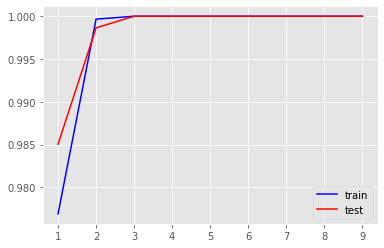

In [4]:
# TODO: RF
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# TODO: Adjust RF Hyperparameters to avoid overfitting
# Random Forest Hyperparameter grids
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Refer to Random Forest documentation for possible parameter values
# n_estimators = [100]
# criterion = ["gini", "entropy", "log_loss"]
# # None or int
# max_depth = [None]
# min_samples_split = [2]
# min_samples_leaf = [1]
# min_weight_fraction_leaf = [0.0]
# max_features = ["sqrt", "log2", None]
# # None or int
# max_leaf_nodes = [None]
# min_impurity_decrease = [0.0]
# bootstrap = [True, False]

# random_forest_parameters = {
#     'n_estimators': n_estimators,
#     'criterion': criterion,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf,
#     'min_weight_fraction_leaf': min_weight_fraction_leaf,
#     'max_features': max_features,
#     'max_leaf_nodes': max_leaf_nodes,
#     'min_impurity_decrease': min_impurity_decrease,
#     'bootstrap': bootstrap,
# }

rf = RandomForestClassifier(random_state = 1, n_estimators = 10)
model_params = {
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'max_depth': [2]}

# clf = GridSearchCV(rf, model_params, cv=5)
# model = clf.fit(smote_train_X, smote_train_Y)
# print(clf.best_params_)
# print('/n')
# clf.best_params_

# # Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters
# random_forest_searched = GridSearchCV(
#     estimator=random_forest, param_grid=random_forest_parameters, verbose=1)

# # RF w/ SMOTE
# random_forest_smote = random_forest.fit(
#     smote_train_X, smote_train_Y)
# random_forest_smote_test = random_forest.fit(smote_test_X, smote_test_Y)
# print('Random Forest w/ SMOTE Test Set Accuracy: ', end="")
# print(random_forest_smote.score(smote_test_X, smote_test_Y))
# print('Random Forest w/ SMOTE Training Set Accuracy: ', end="")
# print(random_forest_smote.score(smote_train_X, smote_train_Y))
rf.fit(smote_train_X, smote_train_Y)
print('---RANDOM FOREST---')
print('RF w/ SMOTE Test Set Accuracy: ', end="")
print(rf.score(smote_test_X, smote_test_Y))
print('RF w/ SMOTE Training Set Accuracy: ', end="")
print(rf.score(smote_train_X, smote_train_Y))
# # RF w/o SMOTE
# random_forest_processed = random_forest.fit(
#     processed_train_X, processed_train_Y)
# random_forest_processed_test = random_forest.fit(processed_test_X, processed_test_Y)
# print('Random Forest w/o SMOTE Test Set Accuracy: ', end="")
# print(random_forest_processed.score(processed_test_X, processed_test_Y))
# print('Random Forest w/o SMOTE Training Set Accuracy: ', end="")
# print(random_forest_processed.score(processed_train_X, processed_train_Y))
# print()
rf.fit(processed_data_X, processed_data_Y)
print('RF w/o SMOTE Test Set Accuracy: ', end="")
print(rf.score(processed_test_X, processed_test_Y))
print('RF w/o SMOTE Training Set Accuracy: ', end="")
print(rf.score(processed_train_X, processed_train_Y))
print()

param_range = np.arange(1,10,1, dtype=int)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    smote_train_X,
    smote_train_Y,
    param_name="max_depth",
    param_range=param_range,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,label="train", color="blue")
plt.plot(param_range, test_scores_mean,label="test", color="red")

plt.legend()
plt.show()

# SVM
print('\n')

---SUPPORT VECTOR MACHINE---
SVM w/ SMOTE Test Set Accuracy: 0.9493670886075949
SVM w/ SMOTE Training Set Accuracy: 1.0
SVM w/o SMOTE Test Set Accuracy: 1.0
SVM w/o SMOTE Training Set Accuracy: 1.0



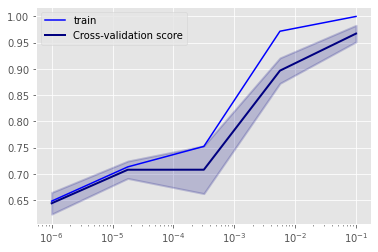

In [5]:
#TODO: SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# TODO: Adjust SVM Hyperparameters
# SVM Hyperparameter grids
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Refer to SVM documentation for possible parameter values

C = [1.0]
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = [3]
# "scale", "auto" or float
gamma = ["scale", "auto"]
coef0 = [0.0]
shrinking = [True, False]
probability = [True, False]
tol = [1e-3]
class_weight = [None, "balanced"]

svm_parameters = {
    'C': C,
    'kernel': kernel,
    'degree': degree,
    'gamma': gamma,
    'coef0': coef0,
    'shrinking': shrinking,
    'probability': probability,
    'tol': tol,
    'class_weight': class_weight
}

# svc = SVC(probability=True)

# # Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters
# svc_searched = GridSearchCV(
#     estimator=svc, param_grid=svm_parameters, verbose=1)
svm = SVC(kernel='rbf', gamma=1)

# SVM w/ SMOTE
svm.fit(smote_train_X, smote_train_Y)
print('---SUPPORT VECTOR MACHINE---')
print('SVM w/ SMOTE Test Set Accuracy: ', end="")
print(svm.score(smote_test_X, smote_test_Y))
print('SVM w/ SMOTE Training Set Accuracy: ', end="")
print(svm.score(smote_train_X, smote_train_Y))

# SVM w/o SMOTE
svm.fit(processed_data_X, processed_data_Y)
print('SVM w/o SMOTE Test Set Accuracy: ', end="")
print(svm.score(processed_test_X, processed_test_Y))
print('SVM w/o SMOTE Training Set Accuracy: ', end="")
print(svm.score(processed_train_X, processed_train_Y))
print()

#validation graph
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    smote_train_X,
    smote_train_Y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

lw = 2
plt.plot(param_range, train_scores_mean,label="train", color="blue")
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()


Validation accuracy for Ensembling w/ SMOTE: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       161

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



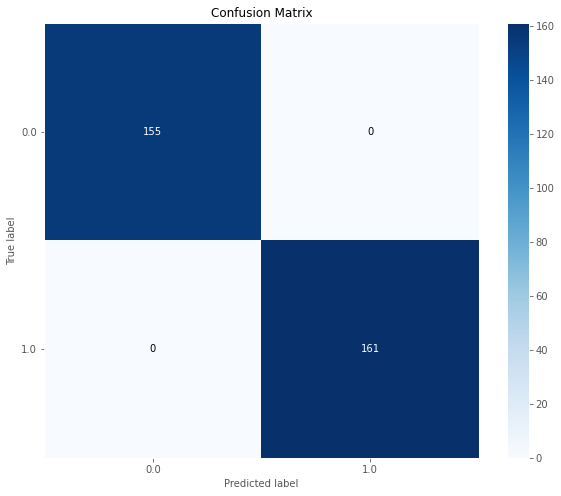

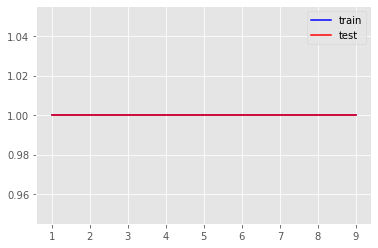


Validation accuracy for Ensembling w/o SMOTE: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       148
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



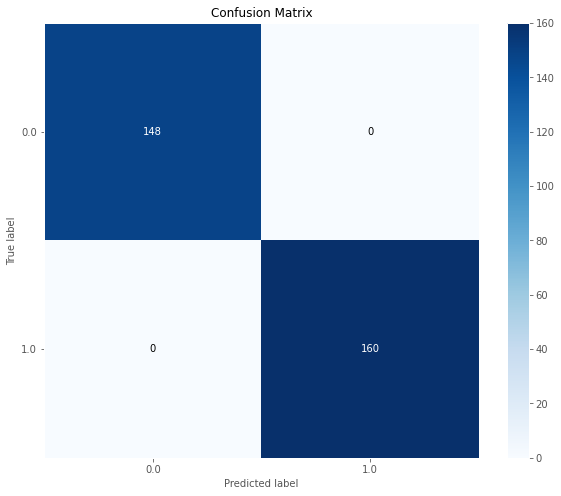

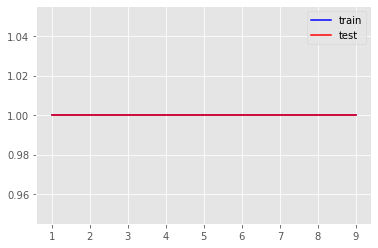

In [6]:
#TODO: MV

# estimators for ensembling MV
estimators = [('RandomForest', rf), ('SVM', svm)]
ensemble_smote = VotingClassifier(estimators, voting='hard', weights=[1,1], n_jobs=-1) #hard voting, because we are doing MV
ensemble_smote.fit(smote_test_X, smote_test_Y)
results_smote = model_selection.cross_val_score(ensemble_smote, smote_test_X, smote_test_Y, scoring='accuracy')
print();
print("Validation accuracy for Ensembling w/ SMOTE: ", end="")
print(results_smote.mean())

# # TODO: Adjust MV Hyperparameters
# # Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters

y_pred = ensemble_smote.predict(smote_test_X)
print(classification_report(smote_test_Y, y_pred))

skplt.metrics.plot_confusion_matrix(smote_test_Y, y_pred, figsize=(10, 8))
plt.show()

# params = {'voting':['hard'], 
#           'weights':[(1,1)]}

# grid_smote = GridSearchCV(estimator=ensemble_smote, param_grid=params, cv=2)

# grid_smote.fit(smote_train_X, smote_train_Y)
# print("Best parameters for Ensembling + SMOTE: ", end="")
# print(grid_smote.best_params_)

#{'voting': 'hard', 'weights': (1, 1)}

# validation graph
param_range = np.arange(1,10,1, dtype=int)
train_scores, test_scores = validation_curve(
    VotingClassifier(estimators),
    smote_test_X,
    smote_test_Y,
    param_name="n_jobs",
    param_range=param_range,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,label="train", color="blue")
plt.plot(param_range, test_scores_mean,label="test", color="red")

plt.legend()
plt.show()

ensemble_proc = VotingClassifier(estimators, voting='hard', weights=[1,1], n_jobs=-1) #hard voting, because we are doing MV
ensemble_proc.fit(processed_test_X, processed_test_Y)
results_proc = model_selection.cross_val_score(ensemble_proc, processed_test_X, processed_test_Y, scoring='accuracy')
print();
print("Validation accuracy for Ensembling w/o SMOTE: ", end="")
print(results_proc.mean())

y_pred = ensemble_proc.predict(processed_test_X)
print(classification_report(processed_test_Y, y_pred))

skplt.metrics.plot_confusion_matrix(processed_test_Y, y_pred, figsize=(10, 8))
plt.show()

# # TODO: Adjust MV Hyperparameters
# Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters
# params = {'voting':['hard'], 
#           'weights':[(1,1)]}

# grid_proc = GridSearchCV(estimator=ensemble_proc, param_grid=params, cv=2)

# grid_proc.fit(processed_train_X, processed_train_Y)
# print("Best parameters for Ensembling w/o SMOTE: ", end="")
# print(grid_proc.best_params_)

#{'voting': 'hard', 'weights': (1, 1)}

param_range = np.arange(1,10,1, dtype=int)
train_scores, test_scores = validation_curve(
    ensemble_proc,
    processed_test_X,
    processed_test_Y,
    param_name="n_jobs",
    param_range=param_range,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,label="train", color="blue")
plt.plot(param_range, test_scores_mean,label="test", color="red")

plt.legend()
plt.show()

# # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# # Refer to MV documentation for possible parameter values